# 라이브러리 로드 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 데이터확인

In [3]:
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [4]:
test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67
...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,Normal Weight,M,51
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,Overweight,M,25
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,Normal Weight,F,42
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,Normal Weight,F,48


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 586.1+ KB


In [7]:
train.nunique(), test.nunique()

(ID                          7500
 Exercise_Duration             30
 Body_Temperature(F)           45
 BPM                           56
 Height(Feet)                   4
 Height(Remainder_Inches)      13
 Weight(lb)                    88
 Weight_Status                  3
 Gender                         2
 Age                           60
 Calories_Burned              270
 dtype: int64,
 ID                          7500
 Exercise_Duration             30
 Body_Temperature(F)           44
 BPM                           56
 Height(Feet)                   4
 Height(Remainder_Inches)      13
 Weight(lb)                    84
 Weight_Status                  3
 Gender                         2
 Age                           60
 dtype: int64)

In [8]:
# 결측치없음
train.isnull().sum(), test.isnull().sum()

(ID                          0
 Exercise_Duration           0
 Body_Temperature(F)         0
 BPM                         0
 Height(Feet)                0
 Height(Remainder_Inches)    0
 Weight(lb)                  0
 Weight_Status               0
 Gender                      0
 Age                         0
 Calories_Burned             0
 dtype: int64,
 ID                          0
 Exercise_Duration           0
 Body_Temperature(F)         0
 BPM                         0
 Height(Feet)                0
 Height(Remainder_Inches)    0
 Weight(lb)                  0
 Weight_Status               0
 Gender                      0
 Age                         0
 dtype: int64)

In [9]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [10]:
test.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.560000,104.058200,95.538933,5.247067,5.714933,165.187413,42.943600
std,8.283402,1.391966,9.579919,0.554436,3.510078,32.986667,17.076529
min,1.000000,99.000000,67.000000,4.000000,0.000000,83.800000,20.000000
25%,8.000000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000
50%,16.000000,104.400000,96.000000,5.000000,5.000000,163.100000,40.000000
75%,23.000000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000
max,30.000000,106.700000,123.000000,7.000000,12.000000,282.200000,79.000000


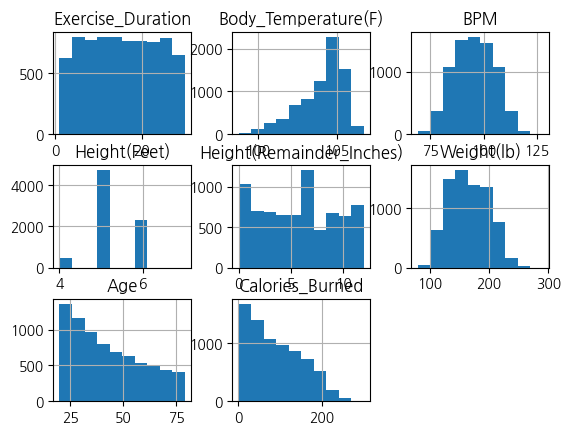

In [11]:
train.hist();

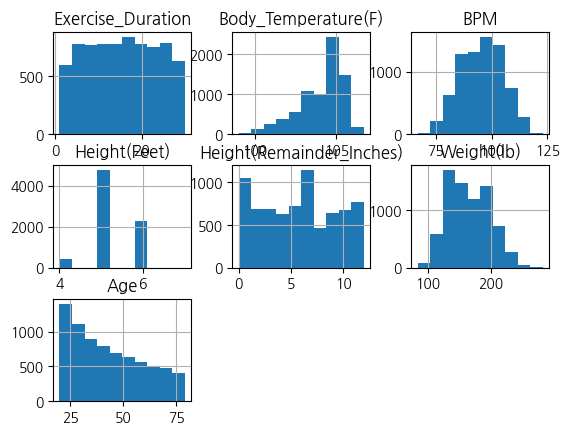

In [12]:
test.hist();

# 피쳐엔지니어링 및 전처리

In [13]:
train['Height(Cm)'] = (train['Height(Feet)']*30.48) + (train['Height(Remainder_Inches)']*2.54)
train['Weight(Kg)'] = round(train['Weight(lb)']*0.453592 , 2)
# train['Weight_Status'] =  train['Weight_Status'].astype('category')

In [14]:
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height(Cm),Weight(Kg)
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0,175.26,69.99
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0,198.12,102.01
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0,190.50,99.02
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0,167.64,67.00
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0,177.80,77.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0,147.32,50.98
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0,172.72,67.00
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0,187.96,91.99
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0,175.26,76.02


In [15]:
성별 = [train["Gender"].str.contains("M")]
choicelist1 = ['1']
train['Gender'] = np.select(성별, choicelist1, default='0')

In [50]:
train['BMI'] = round(train['Weight(Kg)'] / (round(train['Height(Cm)'] *0.01,2)**2),2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13760\4111024200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BMI'] = round(train['Weight(Kg)'] / (round(train['Height(Cm)'] *0.01,2)**2),2)


In [51]:
train

,Exercise_Duration,Body_Temperature(F),BPM,Gender,Age,Height(Cm),Weight(Kg),BMI,Calories_Burned
0,26.0,105.6,107.0,0,45,175.26,69.99,22.85,166.0
1,7.0,103.3,88.0,1,50,198.12,102.01,26.02,33.0
2,7.0,103.3,86.0,1,29,190.50,99.02,27.43,23.0
3,17.0,104.0,99.0,0,33,167.64,67.00,23.74,91.0
4,9.0,102.7,88.0,1,38,177.80,77.02,24.31,32.0
...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,0,75,147.32,50.98,23.59,151.0
7496,20.0,105.3,104.0,0,21,172.72,67.00,22.39,114.0
7497,8.0,103.1,90.0,1,57,187.96,91.99,26.03,41.0
7498,12.0,104.4,97.0,1,35,175.26,76.02,24.82,57.0


In [65]:
# train.loc[(train['Gender'] == 1), 'BMR'] = 66.5 + (13.75*train['Weight(Kg)']) + (5.003*train['Height(Cm)']) - (6.75*train['Age'])
# train['BMR'] = train.loc[(train['Gender'] == 0), 'BMR'] = 655.1 + (9.563*train['Weight(Kg)']) + (1.85*train['Height(Cm)']) - (4.676*train['Age'])
# train

,Exercise_Duration,Body_Temperature(F),BPM,Gender,Age,Height(Cm),Weight(Kg),BMI,Calories_Burned,BMR
0,26.0,105.6,107.0,0,45,175.26,69.99,22.85,166.0,1438.22537
1,7.0,103.3,88.0,1,50,198.12,102.01,26.02,33.0,1763.34363
2,7.0,103.3,86.0,1,29,190.50,99.02,27.43,23.0,1818.84926
3,17.0,104.0,99.0,0,33,167.64,67.00,23.74,91.0,1451.64700
4,9.0,102.7,88.0,1,38,177.80,77.02,24.31,32.0,1542.88426
...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,0,75,147.32,50.98,23.59,151.0,1064.46374
7496,20.0,105.3,104.0,0,21,172.72,67.00,22.39,114.0,1517.15700
7497,8.0,103.1,90.0,1,57,187.96,91.99,26.03,41.0,1615.99437
7498,12.0,104.4,97.0,1,35,175.26,76.02,24.82,57.0,1542.65026


In [64]:
train

,Exercise_Duration,Body_Temperature(F),BPM,Gender,Age,Height(Cm),Weight(Kg),BMI,Calories_Burned,BMR
0,26.0,105.6,107.0,0,45,175.26,69.99,22.85,166.0,1438.22537
1,7.0,103.3,88.0,1,50,198.12,102.01,26.02,33.0,1763.34363
2,7.0,103.3,86.0,1,29,190.50,99.02,27.43,23.0,1818.84926
3,17.0,104.0,99.0,0,33,167.64,67.00,23.74,91.0,1451.64700
4,9.0,102.7,88.0,1,38,177.80,77.02,24.31,32.0,1542.88426
...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,0,75,147.32,50.98,23.59,151.0,1064.46374
7496,20.0,105.3,104.0,0,21,172.72,67.00,22.39,114.0,1517.15700
7497,8.0,103.1,90.0,1,57,187.96,91.99,26.03,41.0,1615.99437
7498,12.0,104.4,97.0,1,35,175.26,76.02,24.82,57.0,1542.65026


In [18]:
test['Height(Cm)'] = (test['Height(Feet)']*30.48) + (test['Height(Remainder_Inches)']*2.54)
test['Weight(Kg)'] = round(test['Weight(lb)']*0.453592 , 2)

In [19]:
성별 = [test["Gender"].str.contains("M")]
choicelist1 = ['1']
test['Gender'] = np.select(성별, choicelist1, default='0')

In [20]:
test['BMI'] = round(test['Weight(Kg)'] / (round(test['Height(Cm)'] *0.01,2)**2),2)

# 피쳐 정리

In [21]:
train = train[['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Gender', 'Age','Height(Cm)', 'Weight(Kg)','BMI', 'Calories_Burned']]
train

,Exercise_Duration,Body_Temperature(F),BPM,Gender,Age,Height(Cm),Weight(Kg),BMI,Calories_Burned
0,26.0,105.6,107.0,0,45,175.26,69.99,22.85,166.0
1,7.0,103.3,88.0,1,50,198.12,102.01,26.02,33.0
2,7.0,103.3,86.0,1,29,190.50,99.02,27.43,23.0
3,17.0,104.0,99.0,0,33,167.64,67.00,23.74,91.0
4,9.0,102.7,88.0,1,38,177.80,77.02,24.31,32.0
...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,0,75,147.32,50.98,23.59,151.0
7496,20.0,105.3,104.0,0,21,172.72,67.00,22.39,114.0
7497,8.0,103.1,90.0,1,57,187.96,91.99,26.03,41.0
7498,12.0,104.4,97.0,1,35,175.26,76.02,24.82,57.0


In [22]:
test = test[['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Gender', 'Age','Height(Cm)','BMI' ,'Weight(Kg)']]
test

,Exercise_Duration,Body_Temperature(F),BPM,Gender,Age,Height(Cm),BMI,Weight(Kg)
0,26.0,105.1,107.0,0,45,154.94,21.64,51.98
1,29.0,104.9,111.0,1,21,187.96,25.46,89.99
2,11.0,104.0,90.0,1,58,175.26,25.15,77.02
3,24.0,105.4,108.0,1,35,182.88,26.57,88.99
4,29.0,106.0,116.0,0,67,170.18,23.18,67.00
...,...,...,...,...,...,...,...,...
7495,28.0,105.6,106.0,1,51,182.88,24.19,81.01
7496,4.0,102.0,84.0,1,25,177.80,26.20,83.01
7497,24.0,105.1,97.0,0,42,157.48,23.94,59.01
7498,8.0,103.1,83.0,0,48,165.10,22.41,61.01


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exercise_Duration    7500 non-null   float64
 1   Body_Temperature(F)  7500 non-null   float64
 2   BPM                  7500 non-null   float64
 3   Gender               7500 non-null   object 
 4   Age                  7500 non-null   int64  
 5   Height(Cm)           7500 non-null   float64
 6   Weight(Kg)           7500 non-null   float64
 7   BMI                  7500 non-null   float64
 8   Calories_Burned      7500 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 527.5+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exercise_Duration    7500 non-null   float64
 1   Body_Temperature(F)  7500 non-null   float64
 2   BPM                  7500 non-null   float64
 3   Gender               7500 non-null   object 
 4   Age                  7500 non-null   int64  
 5   Height(Cm)           7500 non-null   float64
 6   BMI                  7500 non-null   float64
 7   Weight(Kg)           7500 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 468.9+ KB


<AxesSubplot:>

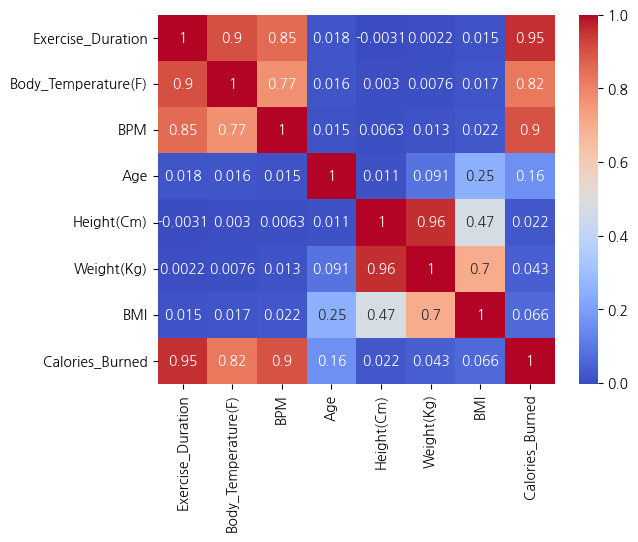

In [25]:
sns.heatmap(train.corr(), annot = True, cmap = 'coolwarm')

# 머신러닝(pycret)

In [26]:
label = 'Calories_Burned'
label

'Calories_Burned'

In [27]:
# from pycaret.regression import *

# reg_test_ln = setup(data=train,
#                    target=label,
#                    train_size= 0.85,
#                    fold=5)

In [28]:
# best = compare_models(sort='rmse')

In [29]:
# best_tune = tune_model(best)

In [30]:
# evaluate_model(best_tune)

In [31]:
# predict_model(best_tune)

In [32]:
# predict = predict_model(best_tune, data= test)
# predict['prediction_label']

In [33]:
# submission['Calories_Burned'] = predict['prediction_label']
# submission

In [34]:
# submission.to_csv('catboost_0.9111.csv',index = False)

# Catboost

In [35]:
from sklearn.model_selection import train_test_split

train_x = train.drop(['Calories_Burned'], axis = 1)
train_y = train['Calories_Burned']
test_x = test

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42, shuffle=True)
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((6750, 8), (750, 8), (6750,), (750,))

In [36]:
import catboost

model_cb = catboost.CatBoostRegressor(eval_metric = 'RMSE',
                                      iterations=1000,
                                      nan_mode='Min',
                                      sampling_frequency='PerTree',
                                      leaf_estimation_method='Newton',
                                      grow_policy='SymmetricTree',
                                      penalties_coefficient=1,
                                      boosting_type='Plain',
                                      model_shrink_mode='Constant',
                                      feature_border_type='GreedyLogSum',
                                      l2_leaf_reg=3,
                                      random_strength=1,
                                      rsm=1,
                                      boost_from_average=True,
                                      model_size_reg=0.5,
                                      subsample=0.800000011920929,
                                      use_best_model=False,
                                      random_seed=4878,
                                      depth=6,
                                      posterior_sampling=False,
                                      border_count=254,
                                      sparse_features_conflict_fraction=0,
                                      leaf_estimation_backtracking= "AnyImprovement",
                                      best_model_min_trees=1,
                                      model_shrink_rate=0,
                                      min_data_in_leaf=1,
                                      loss_function='RMSE',
                                      learning_rate=0.05486400052905083,
                                      score_function='Cosine',
                                      task_type='CPU',
                                      leaf_estimation_iterations=1,
                                      max_leaves = 64 )
model_cb

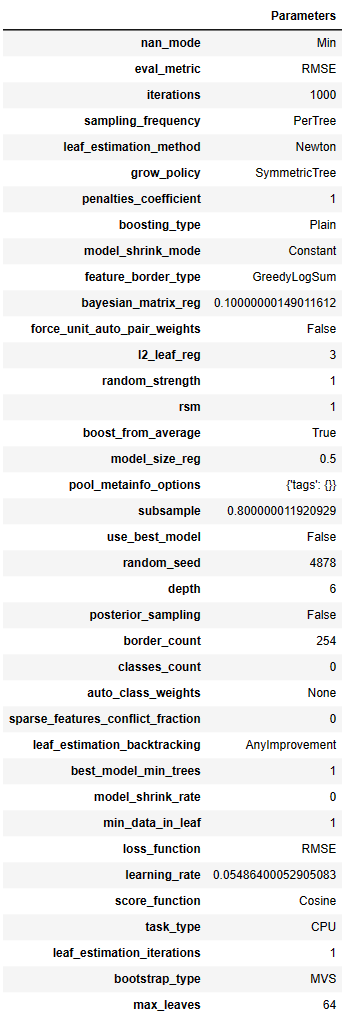

In [37]:
model_cb.fit(train_x, train_y)

0:	learn: 59.7824170	total: 176ms	remaining: 2m 55s
1:	learn: 56.8696445	total: 180ms	remaining: 1m 29s
2:	learn: 54.0277627	total: 184ms	remaining: 1m 1s
3:	learn: 51.4284491	total: 188ms	remaining: 46.9s
4:	learn: 49.0621295	total: 192ms	remaining: 38.2s
5:	learn: 46.6975559	total: 195ms	remaining: 32.3s
6:	learn: 44.4637796	total: 198ms	remaining: 28.1s
7:	learn: 42.3137873	total: 201ms	remaining: 24.9s
8:	learn: 40.3642053	total: 203ms	remaining: 22.4s
9:	learn: 38.4959653	total: 205ms	remaining: 20.3s
10:	learn: 36.6978374	total: 208ms	remaining: 18.7s
11:	learn: 34.9819494	total: 210ms	remaining: 17.3s
12:	learn: 33.3773970	total: 212ms	remaining: 16.1s
13:	learn: 31.8049823	total: 214ms	remaining: 15s
14:	learn: 30.3376073	total: 215ms	remaining: 14.1s
15:	learn: 28.9742057	total: 217ms	remaining: 13.3s
16:	learn: 27.7065148	total: 218ms	remaining: 12.6s
17:	learn: 26.4799838	total: 219ms	remaining: 12s
18:	learn: 25.3002917	total: 221ms	remaining: 11.4s
19:	learn: 24.1819216	to

296:	learn: 1.4748874	total: 564ms	remaining: 1.33s
297:	learn: 1.4675600	total: 565ms	remaining: 1.33s
298:	learn: 1.4648801	total: 567ms	remaining: 1.33s
299:	learn: 1.4618539	total: 568ms	remaining: 1.32s
300:	learn: 1.4575103	total: 569ms	remaining: 1.32s
301:	learn: 1.4528913	total: 570ms	remaining: 1.32s
302:	learn: 1.4476264	total: 571ms	remaining: 1.31s
303:	learn: 1.4446573	total: 573ms	remaining: 1.31s
304:	learn: 1.4391407	total: 574ms	remaining: 1.31s
305:	learn: 1.4365024	total: 575ms	remaining: 1.3s
306:	learn: 1.4311817	total: 576ms	remaining: 1.3s
307:	learn: 1.4273965	total: 578ms	remaining: 1.3s
308:	learn: 1.4222181	total: 579ms	remaining: 1.29s
309:	learn: 1.4179780	total: 580ms	remaining: 1.29s
310:	learn: 1.4136218	total: 581ms	remaining: 1.29s
311:	learn: 1.4103309	total: 582ms	remaining: 1.28s
312:	learn: 1.4063852	total: 584ms	remaining: 1.28s
313:	learn: 1.4042886	total: 585ms	remaining: 1.28s
314:	learn: 1.4006803	total: 586ms	remaining: 1.27s
315:	learn: 1.3

456:	learn: 1.0140221	total: 761ms	remaining: 904ms
457:	learn: 1.0115800	total: 762ms	remaining: 902ms
458:	learn: 1.0087221	total: 763ms	remaining: 900ms
459:	learn: 1.0080419	total: 765ms	remaining: 898ms
460:	learn: 1.0066124	total: 766ms	remaining: 895ms
461:	learn: 1.0047623	total: 767ms	remaining: 893ms
462:	learn: 1.0030746	total: 768ms	remaining: 891ms
463:	learn: 1.0017347	total: 769ms	remaining: 889ms
464:	learn: 1.0003640	total: 771ms	remaining: 886ms
465:	learn: 0.9994430	total: 772ms	remaining: 884ms
466:	learn: 0.9963028	total: 773ms	remaining: 882ms
467:	learn: 0.9944957	total: 774ms	remaining: 880ms
468:	learn: 0.9911919	total: 776ms	remaining: 878ms
469:	learn: 0.9903619	total: 777ms	remaining: 876ms
470:	learn: 0.9891697	total: 778ms	remaining: 874ms
471:	learn: 0.9866928	total: 779ms	remaining: 871ms
472:	learn: 0.9835927	total: 780ms	remaining: 869ms
473:	learn: 0.9817291	total: 781ms	remaining: 867ms
474:	learn: 0.9792498	total: 783ms	remaining: 865ms
475:	learn: 

618:	learn: 0.7933488	total: 958ms	remaining: 590ms
619:	learn: 0.7923584	total: 959ms	remaining: 588ms
620:	learn: 0.7911283	total: 961ms	remaining: 586ms
621:	learn: 0.7907065	total: 962ms	remaining: 584ms
622:	learn: 0.7900489	total: 963ms	remaining: 583ms
623:	learn: 0.7881309	total: 964ms	remaining: 581ms
624:	learn: 0.7871551	total: 965ms	remaining: 579ms
625:	learn: 0.7862049	total: 967ms	remaining: 577ms
626:	learn: 0.7850624	total: 968ms	remaining: 576ms
627:	learn: 0.7841004	total: 969ms	remaining: 574ms
628:	learn: 0.7827035	total: 971ms	remaining: 572ms
629:	learn: 0.7815694	total: 972ms	remaining: 571ms
630:	learn: 0.7803895	total: 973ms	remaining: 569ms
631:	learn: 0.7791834	total: 974ms	remaining: 567ms
632:	learn: 0.7779237	total: 976ms	remaining: 566ms
633:	learn: 0.7768886	total: 977ms	remaining: 564ms
634:	learn: 0.7759095	total: 979ms	remaining: 563ms
635:	learn: 0.7753136	total: 980ms	remaining: 561ms
636:	learn: 0.7738877	total: 981ms	remaining: 559ms
637:	learn: 

932:	learn: 0.5829790	total: 1.35s	remaining: 97ms
933:	learn: 0.5826901	total: 1.35s	remaining: 95.6ms
934:	learn: 0.5822344	total: 1.35s	remaining: 94.1ms
935:	learn: 0.5817180	total: 1.35s	remaining: 92.7ms
936:	learn: 0.5811715	total: 1.36s	remaining: 91.2ms
937:	learn: 0.5808705	total: 1.36s	remaining: 89.7ms
938:	learn: 0.5804163	total: 1.36s	remaining: 88.3ms
939:	learn: 0.5799550	total: 1.36s	remaining: 86.8ms
940:	learn: 0.5796092	total: 1.36s	remaining: 85.3ms
941:	learn: 0.5790320	total: 1.36s	remaining: 83.9ms
942:	learn: 0.5786691	total: 1.36s	remaining: 82.4ms
943:	learn: 0.5781691	total: 1.36s	remaining: 81ms
944:	learn: 0.5779045	total: 1.37s	remaining: 79.5ms
945:	learn: 0.5774464	total: 1.37s	remaining: 78.1ms
946:	learn: 0.5770763	total: 1.37s	remaining: 76.6ms
947:	learn: 0.5765900	total: 1.37s	remaining: 75.2ms
948:	learn: 0.5761107	total: 1.37s	remaining: 73.7ms
949:	learn: 0.5757704	total: 1.37s	remaining: 72.2ms
950:	learn: 0.5752839	total: 1.37s	remaining: 70.8

In [38]:
pred = model_cb.predict(val_x)
pred

array([ 17.79167148, 132.478042  , 119.9308766 ,  13.02825082,
        19.48999601,  73.26330126, 107.58663473,  91.56005962,
        91.17414545,  64.14952936,  94.98125258,  51.79442956,
       181.28258374,  27.92103904, 155.30575986, 186.87670244,
        29.43954845, 131.41735537, 189.78029579, 157.3788178 ,
         8.9114245 ,  75.65488769, 174.37943863,  70.87415367,
       158.72592234, 151.29921327, 120.1102952 ,  68.02741452,
       189.85778329,  45.41717177,  18.61297307, 170.73769372,
        39.74617085, 188.20692299,  96.27741246, 166.34992486,
        67.22023288,  61.57832557, 122.86979335, 107.66299847,
       180.64705782,  36.14723134, 142.46624596,  91.42914313,
       198.57173575,  64.37599298, 202.64958971,  15.10866663,
       199.36306866,   3.88071807, 245.97292018,  35.66550862,
        78.90848607, 117.54988009, 150.2491745 ,   8.072824  ,
       141.89051342, 133.12083937,  58.26415025, 135.4872841 ,
       196.98237427, 207.69113889,  37.73390667,  24.86

In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(val_y, pred, squared=False)

0.8509212004009614

In [40]:
sub_pred = model_cb.predict(test)
sub_pred

array([173.02100532, 189.38613343,  53.64361039, ..., 130.01126662,
        32.12684876, 191.35015694])

In [41]:
submission['Calories_Burned'] = sub_pred
submission['Calories_Burned']

0       173.021005
1       189.386133
2        53.643610
3       161.595513
4       223.852414
           ...    
7495    194.093127
7496      9.917661
7497    130.011267
7498     32.126849
7499    191.350157
Name: Calories_Burned, Length: 7500, dtype: float64

In [42]:
submission.to_csv('catboost_0.8509.csv',index=False)

# PolynomialFeatures

데이콘 코드공유를 참고했으며, 피쳐를 폭발적으로 늘려주는 방법

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
train_poly = pd.DataFrame(poly.fit_transform(train_x))
val_poly = pd.DataFrame(poly.fit_transform(val_x))
train_poly

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,21.0,104.7,89.0,0.0,53.0,165.10,69.99,25.71,441.0,...,2809.0,8750.30,3709.47,1362.63,27258.0100,11555.3490,4244.7210,4898.6001,1799.4429,661.0041
1,1.0,26.0,105.8,106.0,1.0,35.0,200.66,101.01,25.00,676.0,...,1225.0,7023.10,3535.35,875.00,40264.4356,20268.6666,5016.5000,10203.0201,2525.2500,625.0000
2,1.0,7.0,102.7,87.0,1.0,28.0,177.80,77.02,24.31,49.0,...,784.0,4978.40,2156.56,680.68,31612.8400,13694.1560,4322.3180,5932.0804,1872.3562,590.9761
3,1.0,23.0,104.9,102.0,0.0,61.0,157.48,60.01,24.35,529.0,...,3721.0,9606.28,3660.61,1485.35,24799.9504,9450.3748,3834.6380,3601.2001,1461.2435,592.9225
4,1.0,20.0,104.7,102.0,1.0,30.0,177.80,82.01,25.88,400.0,...,900.0,5334.00,2460.30,776.40,31612.8400,14581.3780,4601.4640,6725.6401,2122.4188,669.7744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,1.0,2.0,100.4,82.0,1.0,33.0,200.66,96.98,24.00,4.0,...,1089.0,6621.78,3200.34,792.00,40264.4356,19460.0068,4815.8400,9405.1204,2327.5200,576.0000
6746,1.0,10.0,103.8,87.0,0.0,30.0,160.02,58.01,22.66,100.0,...,900.0,4800.60,1740.30,679.80,25606.4004,9282.7602,3626.0532,3365.1601,1314.5066,513.4756
6747,1.0,11.0,104.0,80.0,1.0,37.0,185.42,89.99,26.29,121.0,...,1369.0,6860.54,3329.63,972.73,34380.5764,16685.9458,4874.6918,8098.2001,2365.8371,691.1641
6748,1.0,11.0,104.4,84.0,0.0,53.0,160.02,63.00,24.61,121.0,...,2809.0,8481.06,3339.00,1304.33,25606.4004,10081.2600,3938.0922,3969.0000,1550.4300,605.6521


In [44]:
val_poly

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,5.0,102.0,81.0,1.0,57.0,187.96,89.99,25.46,25.0,...,3249.0,10713.72,5129.43,1451.22,35328.9616,16914.5204,4785.4616,8098.2001,2291.1454,648.2116
1,1.0,24.0,105.3,96.0,0.0,55.0,162.56,63.00,23.71,576.0,...,3025.0,8940.80,3465.00,1304.05,26425.7536,10241.2800,3854.2976,3969.0000,1493.7300,562.1641
2,1.0,21.0,105.3,102.0,0.0,40.0,177.80,73.98,23.35,441.0,...,1600.0,7112.00,2959.20,934.00,31612.8400,13153.6440,4151.6300,5473.0404,1727.4330,545.2225
3,1.0,3.0,101.8,89.0,0.0,31.0,162.56,67.00,25.22,9.0,...,961.0,5039.36,2077.00,781.82,26425.7536,10891.5200,4099.7632,4489.0000,1689.7400,636.0484
4,1.0,5.0,102.6,82.0,1.0,56.0,187.96,92.99,26.31,25.0,...,3136.0,10525.76,5207.44,1473.36,35328.9616,17478.4004,4945.2276,8647.1401,2446.5669,692.2161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.0,28.0,105.1,109.0,1.0,57.0,175.26,76.02,24.82,784.0,...,3249.0,9989.82,4333.14,1414.74,30716.0676,13323.2652,4349.9532,5779.0404,1886.8164,616.0324
746,1.0,3.0,101.5,90.0,0.0,28.0,170.18,67.99,23.53,9.0,...,784.0,4765.04,1903.72,658.84,28961.2324,11570.5382,4004.3354,4622.6401,1599.8047,553.6609
747,1.0,2.0,100.4,81.0,1.0,48.0,172.72,77.02,25.73,4.0,...,2304.0,8290.56,3696.96,1235.04,29832.1984,13302.8944,4444.0856,5932.0804,1981.7246,662.0329
748,1.0,22.0,105.8,107.0,1.0,28.0,195.58,100.02,26.04,484.0,...,784.0,5476.24,2800.56,729.12,38251.5364,19561.9116,5092.9032,10004.0004,2604.5208,678.0816


In [45]:
train_y

7005     97.0
5112    174.0
401      21.0
1702    144.0
157     109.0
        ...  
5191      6.0
5226     42.0
5390     29.0
860      46.0
7270      7.0
Name: Calories_Burned, Length: 6750, dtype: float64

In [46]:
val_y

970      19.0
6279    132.0
1859    120.0
6803     13.0
6305     20.0
        ...  
2462    214.0
3213     13.0
3132      6.0
6007    142.0
4084    130.0
Name: Calories_Burned, Length: 750, dtype: float64

In [47]:
model_cb.fit(train_poly, train_y)

0:	learn: 59.6921228	total: 4.55ms	remaining: 4.54s
1:	learn: 56.7809709	total: 7.78ms	remaining: 3.88s
2:	learn: 54.0139665	total: 10.7ms	remaining: 3.54s
3:	learn: 51.4389513	total: 12.9ms	remaining: 3.22s
4:	learn: 48.8580790	total: 15.5ms	remaining: 3.08s
5:	learn: 46.5067268	total: 17.8ms	remaining: 2.95s
6:	learn: 44.2083781	total: 20ms	remaining: 2.83s
7:	learn: 42.0874473	total: 22.6ms	remaining: 2.8s
8:	learn: 40.0908365	total: 24.9ms	remaining: 2.74s
9:	learn: 38.1690447	total: 27.4ms	remaining: 2.71s
10:	learn: 36.3997137	total: 29.9ms	remaining: 2.69s
11:	learn: 34.6894607	total: 32.1ms	remaining: 2.64s
12:	learn: 33.0326559	total: 34.6ms	remaining: 2.63s
13:	learn: 31.4908238	total: 37.1ms	remaining: 2.61s
14:	learn: 30.0357288	total: 39.4ms	remaining: 2.59s
15:	learn: 28.6366012	total: 42.1ms	remaining: 2.59s
16:	learn: 27.3895884	total: 45ms	remaining: 2.6s
17:	learn: 26.1239935	total: 47.4ms	remaining: 2.59s
18:	learn: 24.9240949	total: 49.9ms	remaining: 2.58s
19:	learn

171:	learn: 2.2510848	total: 403ms	remaining: 1.94s
172:	learn: 2.2433856	total: 406ms	remaining: 1.94s
173:	learn: 2.2330450	total: 408ms	remaining: 1.94s
174:	learn: 2.2228007	total: 410ms	remaining: 1.93s
175:	learn: 2.2179827	total: 413ms	remaining: 1.93s
176:	learn: 2.2048833	total: 415ms	remaining: 1.93s
177:	learn: 2.1959245	total: 417ms	remaining: 1.93s
178:	learn: 2.1867141	total: 420ms	remaining: 1.93s
179:	learn: 2.1797497	total: 422ms	remaining: 1.92s
180:	learn: 2.1726664	total: 424ms	remaining: 1.92s
181:	learn: 2.1638865	total: 427ms	remaining: 1.92s
182:	learn: 2.1554781	total: 429ms	remaining: 1.92s
183:	learn: 2.1504299	total: 431ms	remaining: 1.91s
184:	learn: 2.1442721	total: 434ms	remaining: 1.91s
185:	learn: 2.1372967	total: 436ms	remaining: 1.91s
186:	learn: 2.1290843	total: 439ms	remaining: 1.91s
187:	learn: 2.1218191	total: 443ms	remaining: 1.91s
188:	learn: 2.1138976	total: 445ms	remaining: 1.91s
189:	learn: 2.1072733	total: 448ms	remaining: 1.91s
190:	learn: 

331:	learn: 1.4541096	total: 807ms	remaining: 1.62s
332:	learn: 1.4507835	total: 810ms	remaining: 1.62s
333:	learn: 1.4489273	total: 812ms	remaining: 1.62s
334:	learn: 1.4458786	total: 814ms	remaining: 1.62s
335:	learn: 1.4426492	total: 817ms	remaining: 1.61s
336:	learn: 1.4407835	total: 819ms	remaining: 1.61s
337:	learn: 1.4385912	total: 821ms	remaining: 1.61s
338:	learn: 1.4360242	total: 824ms	remaining: 1.6s
339:	learn: 1.4331366	total: 826ms	remaining: 1.6s
340:	learn: 1.4293987	total: 828ms	remaining: 1.6s
341:	learn: 1.4273371	total: 830ms	remaining: 1.6s
342:	learn: 1.4251676	total: 832ms	remaining: 1.59s
343:	learn: 1.4215275	total: 835ms	remaining: 1.59s
344:	learn: 1.4197424	total: 837ms	remaining: 1.59s
345:	learn: 1.4171355	total: 839ms	remaining: 1.58s
346:	learn: 1.4136525	total: 841ms	remaining: 1.58s
347:	learn: 1.4114095	total: 843ms	remaining: 1.58s
348:	learn: 1.4083236	total: 846ms	remaining: 1.58s
349:	learn: 1.4059531	total: 848ms	remaining: 1.57s
350:	learn: 1.40

498:	learn: 1.1219106	total: 1.21s	remaining: 1.21s
499:	learn: 1.1191535	total: 1.21s	remaining: 1.21s
500:	learn: 1.1165479	total: 1.21s	remaining: 1.21s
501:	learn: 1.1147974	total: 1.22s	remaining: 1.21s
502:	learn: 1.1131855	total: 1.22s	remaining: 1.2s
503:	learn: 1.1115233	total: 1.22s	remaining: 1.2s
504:	learn: 1.1090367	total: 1.22s	remaining: 1.2s
505:	learn: 1.1067736	total: 1.23s	remaining: 1.2s
506:	learn: 1.1054099	total: 1.23s	remaining: 1.19s
507:	learn: 1.1039173	total: 1.23s	remaining: 1.19s
508:	learn: 1.1023959	total: 1.23s	remaining: 1.19s
509:	learn: 1.1010669	total: 1.24s	remaining: 1.19s
510:	learn: 1.0995107	total: 1.24s	remaining: 1.19s
511:	learn: 1.0976793	total: 1.24s	remaining: 1.18s
512:	learn: 1.0961666	total: 1.24s	remaining: 1.18s
513:	learn: 1.0940915	total: 1.25s	remaining: 1.18s
514:	learn: 1.0915058	total: 1.25s	remaining: 1.18s
515:	learn: 1.0907616	total: 1.25s	remaining: 1.17s
516:	learn: 1.0891679	total: 1.25s	remaining: 1.17s
517:	learn: 1.08

725:	learn: 0.8737303	total: 1.81s	remaining: 684ms
726:	learn: 0.8725458	total: 1.81s	remaining: 682ms
727:	learn: 0.8714517	total: 1.82s	remaining: 679ms
728:	learn: 0.8709095	total: 1.82s	remaining: 677ms
729:	learn: 0.8704100	total: 1.82s	remaining: 674ms
730:	learn: 0.8696901	total: 1.82s	remaining: 672ms
731:	learn: 0.8688896	total: 1.83s	remaining: 669ms
732:	learn: 0.8681679	total: 1.83s	remaining: 667ms
733:	learn: 0.8677916	total: 1.83s	remaining: 664ms
734:	learn: 0.8670110	total: 1.83s	remaining: 662ms
735:	learn: 0.8664108	total: 1.84s	remaining: 659ms
736:	learn: 0.8657960	total: 1.84s	remaining: 657ms
737:	learn: 0.8652515	total: 1.84s	remaining: 654ms
738:	learn: 0.8644149	total: 1.84s	remaining: 652ms
739:	learn: 0.8638191	total: 1.85s	remaining: 649ms
740:	learn: 0.8633262	total: 1.85s	remaining: 647ms
741:	learn: 0.8624739	total: 1.85s	remaining: 644ms
742:	learn: 0.8619081	total: 1.85s	remaining: 642ms
743:	learn: 0.8614732	total: 1.86s	remaining: 639ms
744:	learn: 

888:	learn: 0.7678283	total: 2.22s	remaining: 277ms
889:	learn: 0.7671470	total: 2.22s	remaining: 274ms
890:	learn: 0.7669422	total: 2.22s	remaining: 272ms
891:	learn: 0.7666657	total: 2.22s	remaining: 269ms
892:	learn: 0.7659503	total: 2.23s	remaining: 267ms
893:	learn: 0.7655079	total: 2.23s	remaining: 264ms
894:	learn: 0.7651268	total: 2.23s	remaining: 262ms
895:	learn: 0.7646032	total: 2.26s	remaining: 263ms
896:	learn: 0.7643518	total: 2.27s	remaining: 260ms
897:	learn: 0.7640274	total: 2.27s	remaining: 258ms
898:	learn: 0.7637331	total: 2.27s	remaining: 256ms
899:	learn: 0.7628276	total: 2.28s	remaining: 253ms
900:	learn: 0.7624277	total: 2.28s	remaining: 251ms
901:	learn: 0.7619296	total: 2.28s	remaining: 248ms
902:	learn: 0.7617030	total: 2.28s	remaining: 245ms
903:	learn: 0.7611603	total: 2.29s	remaining: 243ms
904:	learn: 0.7603504	total: 2.29s	remaining: 240ms
905:	learn: 0.7600810	total: 2.29s	remaining: 238ms
906:	learn: 0.7593294	total: 2.29s	remaining: 235ms
907:	learn: 

In [48]:
preds = model_cb.predict(val_poly)
preds

array([ 18.77666973, 131.71501257, 119.71736857,  13.72740522,
        19.2970541 ,  73.03353464, 109.28941759,  92.01496072,
        94.14050447,  65.55520715,  95.55759378,  51.76254685,
       180.45121977,  28.23075433, 158.45912404, 185.85325815,
        30.10756184, 132.93044944, 190.62891038, 158.66348674,
         9.71985284,  76.04690527, 175.02747758,  69.74857758,
       158.1998638 , 149.80198985, 119.28274699,  69.08966464,
       188.8825247 ,  44.78406495,  18.78665694, 170.55294902,
        39.80783269, 188.64807793,  95.49109299, 164.40656789,
        67.59956743,  60.68100155, 121.47130771, 107.65308164,
       181.82548836,  36.31071294, 144.4426559 ,  92.69323   ,
       198.73946674,  64.09310512, 202.08190641,  14.93345008,
       201.05354846,   3.56472294, 250.23020868,  35.66947978,
        78.63255874, 118.60958379, 150.63068147,   8.11854221,
       140.21939356, 132.71821044,  56.74931858, 134.24084172,
       195.150229  , 209.61887553,  38.02262355,  25.10

In [49]:
mean_squared_error(val_y, preds, squared=False)

1.112291530695717